## **1. Introduction**

---

**Team 11: Aryan Kumar, Sneha Ekka, Tanvi Sheth, Yifan (Eric) Bai**

**[Colab Link](https://colab.research.google.com/drive/1PDtojvG2VrQdd7pLZ3bVXEBJ-0Rs-WGf?usp=sharing)**

### **i. Problem Definition**

---

Invistico Airline Data has flight information for over 120,000 flights and their corresponding satisfaction metric.

Our objective with this project is to examine the various aspects of an in-flight experience which influence the overall satisfaction level of a customer. By identifying and understanding these factors, we want to be able to help the Invistico to enhance and sustain these critical aspects. We understand that satisfaction is fairly subjective, and so this analysis will mainly be focused on factors that are in control of the airlines. Keeping the external factors constant, we will conduct an analysis to determine the effect of various components on passengers' satisfaction.

This analysis aims to provide insights that can help Ivestico in optimizing the flight experience and ensuring customer satisfaction.


### **ii. Possible Analysis**

---

Our objective in this analysis is to predict overall customer satisfaction level, categorizing passengers into 'satisfied' or 'dissatisfied', based on their interactions with the airline's end-to-end services. We'll conduct a comprehensive examination of the dataset, exploring the impact of various features on the target variable - *satisfaction*.

Our approach involves leveraging machine learning techniques, with a focus on classification models, to gain insights into the factors influencing passenger satisfaction. Through this analysis, we aim to uncover key drivers of customer contentment and develop a predictive model that can aid in improving the airline's services and enhancing overall passenger experience.

### **iii. Goal of the project**
---
With this analysis, we aim to answer the following questions:

*   Which flight components had the most influence on customer satisfaction?
*   Which features an airline can consider inconsequential?
*   What are the most optimum feature values to ensure a customer is satisfied?
*   Make recommendations for airlines to improve features that have the most impact on customer satisfaction.

### **iv. Data and It's Source**

---

**Data Description:**

Our dataset contains 21 features and 129880 entries. The *'satisfaction'* column will be our target variable. It includes data points such as class, flight distance, and inflight entertainment to be used to predict whether a customer will be satisfied with their flight experience.

**Data Overview:**

The following table explains each feature in the dataset.

|Sr. No.| Feature           | Description |
|:----------------| :---------------- | :-------- |
|1| satisfaction | Satisfied / Dissatisfied |
|2| Customer Type | Loyal customer / Disloyal customer |
|3| Age              | Age of the customer |
|4| Type of Travel |  Personal travel / Business travel   |
|5| Class |  Eco / Eco Plus / Business  |
|6| Flight Distance |  Flight distance  |
|7| Seat comfort |  Rating - 0 to 5  |
|8| Departure/Arrival time convenient | Rating - 0 to 5 |
|9| Food and drink | Rating - 0 to 5 |
|10| Gate location | Rating - 0 to 5 |
|11| Inflight wifi service | Rating - 0 to 5 |
|12| Inflight entertainment | Rating - 0 to 5 |
|13| Online support | Rating - 0 to 5 |
|14| Ease of Online booking | Rating - 0 to 5 |
|15| On-board service | Rating - 0 to 5 |
|16| Leg room service | Rating - 0 to 5 |
|17| Baggage handling | Rating - 0 to 5 |
|18| Checkin service | Rating - 0 to 5 |
|19| Cleanliness | Rating - 0 to 5 |
|20| Online boarding | Rating - 0 to 5 |
|21| Departure Delay in Minutes | Delay in departure |
|22| Arrival Delay in Minutes | Delay in arrival at destination |

**Data Source:**

This dataset is from Kaggle and is owned by Yakhyojon. It can be accessed here -
[source](https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline)

## **2. Data Loading & Exploration**

---

We will now load, explore, and prepare the data for further analysis

In [1]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Loading the dataset
import pandas as pd
import numpy as np

file_path = '/content/gdrive/MyDrive/BA810-B11-Team-Project/Airline satisfaction/Invistico_Airline.csv'
airline = pd.read_csv(file_path)
airline.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# Dataset info and shape
airline.info()
airline.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

(129880, 22)

Let's take a look at the summary statistics for the numeric and categorical columns.

In [4]:
# Descriptive stats of numerical columns
airline.describe(include='number')

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# Descriptive stats of categorical/object columns
airline.describe(include='object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


Looking at the features, we can see that a lot of these features are inter-connected. Let's take a look at the correlation between these values to better understand our features.

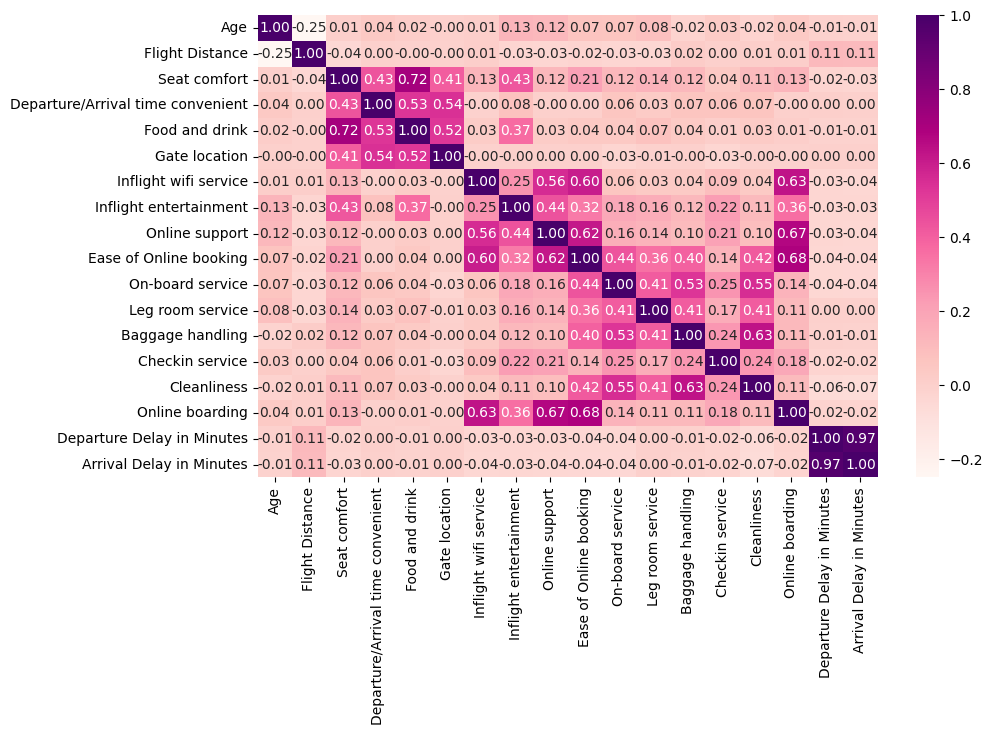

In [6]:
# Checking the correlation heatmap of all the variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix = airline.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu')
plt.show();

**Note:**
- The strong correlation between Arrival Delay in Minutes and Departure Delay in Minutes is understandable, as a delay during departure naturally impacts the arrival time, given constant flight speed.

- There is a noticeable correlation between Seat Comfort and the availability of Food and Drink, suggesting a relationship between passengers' satisfaction with seating comfort and the provision of in-flight refreshments.

- Online Boarding, Online Support, and Ease of Online Booking exhibit significant correlation, indicating a cohesive relationship among these factors, as they all pertain to the online services category.

In [7]:
# Checking for null values
airline.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
# Checking for duplicate rows, if any
airline[airline.duplicated()]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


**Note:**
- There are 393 Null Values in the Arrival Delay in Minutes column.
- As we can see, there are no duplicate values.

### **i. Visualizations**

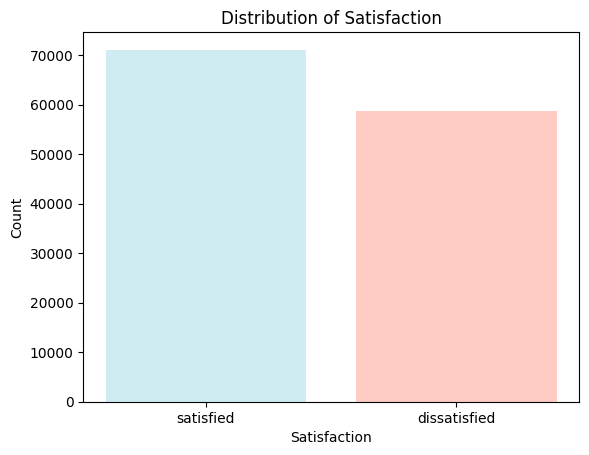

Percentage of Satisfied Customers: 54.73%
Percentage of Dissatisfied Customers: 45.27%


In [9]:
# Checking the distribution of our target variable 'satisfaction'
import matplotlib.pyplot as plt

# Set the pastel color palette
pastel_colors = ['#9edae5', '#ff9a8b', '#ffdb58', '#a5c2f9', '#98d7a1']

# Distribution of Satisfaction
satisfaction_counts = airline['satisfaction'].value_counts()
plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=pastel_colors, alpha=0.5)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction')
plt.show();

total_customers = len(airline)
satisfied_percentage = (satisfaction_counts['satisfied'] / total_customers) * 100
dissatisfied_percentage = (satisfaction_counts['dissatisfied'] / total_customers) * 100

print(f'Percentage of Satisfied Customers: {satisfied_percentage:.2f}%')
print(f'Percentage of Dissatisfied Customers: {dissatisfied_percentage:.2f}%')

In [10]:
# Mapping categories in the target variable ('Satisfaction') to 1: satisfied, 0: dissatisfied
airline['satisfaction'] = airline['satisfaction'].replace({'satisfied':1, 'dissatisfied':0})
display(pd.DataFrame(airline['satisfaction'].value_counts()))

,satisfaction
1,71087
0,58793


**Note:**
- It is important to note that our target variable `satisfaction` is quite balanced in proportion which rules out chances of bias in model prediction.

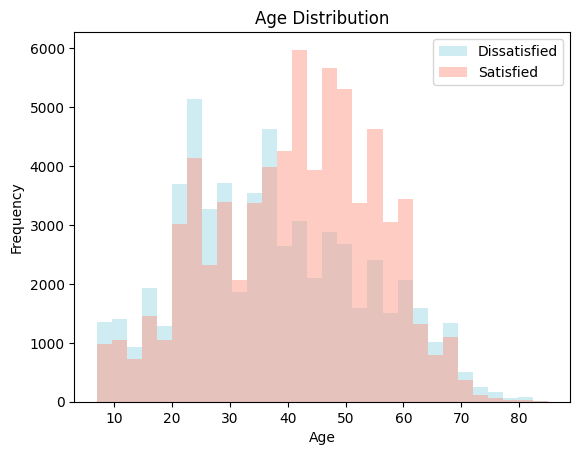

In [11]:
satisfied = airline[airline['satisfaction']==1]
dissatisfied = airline[airline['satisfaction']==0]

plt.hist(dissatisfied['Age'], bins=30, label='Dissatisfied', color=pastel_colors[0], alpha=0.5)
plt.hist(satisfied['Age'], bins=30, label='Satisfied', color=pastel_colors[1], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.legend()
plt.show();

**Note:**
- From this graph, we see that the customers in a lower age group (around 30 years of age) are more dissatisfied with their travel experience as compared to customers who are around 40-45 years of age.

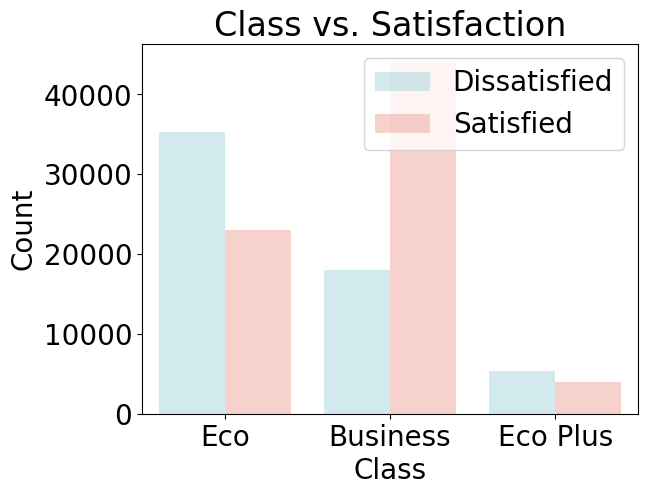

In [50]:
# Class vs. Satisfaction
sns.countplot(x='Class', hue='satisfaction', data=airline, palette=pastel_colors, alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class vs. Satisfaction')
plt.legend(labels=['Dissatisfied','Satisfied'])
plt.show();

**Note:**
- We notice that the majority of satisfied customer travel in Business Class. One surprising revelation is that the number of satisfied customers in Eco Plus is much lower than the Eco class.
- However, out of the customers travelling in Eco class, a higher proportion seems to be dissatisfied.

## **3. Performing Train-Test Split**

---

Before we start with processing any of our data, we split the dataset into train and test sets so that all of our processing and modeling is done on the train set. Since we have over 120,000 rows, we split the data to have a test set of 25%, which is a little over 32,000 rows. This gives us enough data to calculate the performance of the models.

In [13]:
from sklearn.model_selection import train_test_split

# Extracting features and target in X & y
X = airline.drop(columns=['satisfaction'], axis=1)
y = airline['satisfaction'].copy()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Shape of train-test split data are:')
print('X_train: {}  y_train: {}'.format(X_train.shape, y_train.shape))
print('X_test: {}  y_test: {}'.format(X_test.shape, y_test.shape))

Shape of train-test split data are:
X_train: (97410, 21)  y_train: (97410,)
X_test: (32470, 21)  y_test: (32470,)


## **4. Building Preprocessing Pipeline**

---

We start the process by creating a pipeline which includes data transformations for specific columns.

*   The pipeline involves transforming numerical features with StandardScaler for normalization and categorical features with OneHotEncoder for converting them into a numerical format.
*   One additional step in the pipeline is to impute values for missing fields in *'Arrival Delay in Minutes'* column using the *'Departure Delay in Minutes'* column, since we observe that the values for both these columns are similar assuming that the flight speed remains constant.

In [14]:
# Separating numerical and categorical features
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn import set_config

set_config(display='diagram')

# Initializing transformer for numerical features
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

# Initializing transformer for categorical features
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(drop="first"))
    ])

# Creating the preprocessor pipeline and Building a column transformer
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', num_pipeline, num_cols),
                    ('cat', cat_pipeline, cat_cols)
                ])

display(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['Customer Type', 'Type of Travel', 'Class'], dtype='object'))])

## **5. Feature Selection**

---

The main goal of feature selection is to identify a subset of relevant and important features out of all the available features in the dataset.

- **All features:**
      'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Departure Delay in Minutes'

In [16]:
# To modify selected feature list
def modify_feature_list(feature_list):

    # Define the sets of features to look for
    customer_types = {'Loyal Customer', 'disloyal Customer'}
    classes = {'Business', 'Eco', 'Eco Plus'}
    travel_types = {'Business travel', 'Personal Travel'}

    # Create a set from the feature list for efficient look-up
    feature_set = set(feature_list)

    # Check and modify for customer types
    if customer_types & feature_set:
        feature_set -= customer_types
        feature_set.add('Customer Type')

    # Check and modify for class types
    if classes & feature_set:
        feature_set -= classes
        feature_set.add('Class')

    # Check and modify for travel types
    if travel_types & feature_set:
        feature_set -= travel_types
        feature_set.add('Type of Travel')

    # Convert set back to list
    modified_feature_list = list(feature_set)
    return modified_feature_list

In [17]:
# To update col lists
def update_col_lists(numerical_cols, categorical_cols, modified):

    updated_numerical_cols = [col for col in numerical_cols if col in modified]
    updated_categorical_cols = [col for col in categorical_cols if col in modified]
    return updated_numerical_cols, updated_categorical_cols

- Here the modify_feature_list takes a list of features as input and modifies it based on specific conditions. If the input list contains either 'Loyal Customer' or 'Disloyal Customer', it removes them and adds 'Customer Type'. If it contains 'Business', 'Eco', or 'Eco Plus', it removes them and adds 'Class'. Similarly, if it contains 'Business travel' or 'Personal travel', it removes them and adds 'Type of Travel'.
- For the feature selection process, we will use a combination of three approaches to filter out the most relevant features for the target.

### **i. Select K Best**

- Select K Best narrows down features by ranking them based on importance, improving model performance and interpretability.
- We feed all our 21 features into this model.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest()),
    ('model', LogisticRegression())
])

# Parameter grid for RandomizedSearchCV
param_grid = {
    'feature_selection__k': list(range(1, X_train.shape[1] + 1))  # range of 'k' to try
}

# Create and fit the RandomizedSearchCV
search = RandomizedSearchCV(model_pipeline, param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
search.fit(X_train, y_train)

# Best parameters and model
best_k = search.best_params_['feature_selection__k']
best_model = search.best_estimator_

# Output the best 'k' and the best model
print(f"Best k: {best_k}")

selected_features_with_prefix = best_model["preprocessor"].get_feature_names_out()[best_model["feature_selection"].get_support()]
selected = [name.split('_')[-1] for name in selected_features_with_prefix]

print(f'The selected features are {selected}')

Best k: 19
The selected features are ['Age', 'Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus']


### **ii. Recursive Feature Elimination**

- Recursive Feature Selection finds the most informative features, making models more efficient and adaptable.
- The 19 features from SelectKModel are used as an input for this model.

In [19]:
# Modify selected list

# Getting the correct format of selected feature names for X
modified = modify_feature_list(selected)
X_train_fmodel = X_train[modified]
X_test_fmodel = X_test[modified]

# Obtaining updated columns list for pipeline
numerical_cols, categorical_cols = update_col_lists(num_cols, cat_cols, modified)

# Modified pipeline
preprocessor_fmodel = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ])

In [20]:
from sklearn.feature_selection import RFECV

# Model pipeline
rfecv = RFECV(LogisticRegression(), scoring='neg_root_mean_squared_error')

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_fmodel),
    ('feature_selection', rfecv),
    ('model', LogisticRegression())
])

# Create and fit the pipeline
model_pipeline.fit(X_train_fmodel, y_train)

# Output the best selected features and the best model
optimal_num_features = rfecv.n_features_

selected_features_with_prefix = model_pipeline['preprocessor'].get_feature_names_out()[rfecv.support_]
selected = [name.split('_')[-1] for name in selected_features_with_prefix]

print(f"Optimal number of features are: {optimal_num_features}")
print(f"Selected features are: {selected}")

Optimal number of features are: 16
Selected features are: ['Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Online boarding', 'Arrival Delay in Minutes', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus']


### **iii. Sequential Feature Selection (Foward Selection)**

- Sequential Feature Selection explores different feature combinations, helping discover subsets that optimize accuracy and enhance model robustness and interpretability.
- The progressively filtered features from the above two models act as an input here to provide us with the 13 most relevant features.

In [21]:
# Modify selected list

# Getting the correct format of selected feature names for X
modified = modify_feature_list(selected)
X_train_rfe = X_train[modified]
X_test_rfe = X_test[modified]

# Obtaining updated columns list for pipeline
numerical_cols, categorical_cols = update_col_lists(num_cols, cat_cols, modified)

# Modified pipeline
preprocessor_rfe = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ])

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector

# Model pipeline
sfs = SequentialFeatureSelector(LogisticRegression(), forward=True, k_features="best", scoring='neg_root_mean_squared_error')

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_rfe),
    ('feature_selection', sfs)
])

# Create and fit the pipeline
model_pipeline.fit(X_train_rfe, y_train)

# Output the best selected features and the best model
optimal_features = list(X_train.columns[list(sfs.k_feature_idx_)])

print(f"Optimal number of features are: {len(optimal_features)}")
print(f"Selected features are: {optimal_features}")

Optimal number of features are: 13
Selected features are: ['Customer Type', 'Age', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight wifi service', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling']


### **iv. Final Pipeline with Selected Features**

- **Selected features:**
      'Customer Type', 'Age', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight wifi service', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling'

In [23]:
# Subsetting train and test sets by using the optimal features obtained above
X_train_select = X_train.iloc[:, list(sfs.k_feature_idx_)]
X_test_select = X_test.iloc[:, list(sfs.k_feature_idx_)]

In [24]:
# Update cols lists & pipeline
final_features = X_train_select.columns

numerical_cols_select, categorical_cols_select = update_col_lists(num_cols, cat_cols, final_features)

preprocessor_select = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols_select),
        ('cat', cat_pipeline, categorical_cols_select)
    ])

display(preprocessor_select)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Seat comfort',
                                  'Departure/Arrival time convenient',
                                  'Food and drink', 'Inflight wifi service',
                                  'Online support', 'Ease of Online booking',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Customer Type', 'Type of Travel', 'Class'])])

## **6. Model Selection & Hyperparameter Tuning**

---

In this step, we evaluate a few metrics for each of the below models using cross-validation to choose the best performing model:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Support Vector Classifier
4. Decision Tree Classifier
5. Random Forest Classifier

In [25]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

# Creating a list to store all model performance metrics
results_list = []

# Defining a function to print out various model performance metrics for each model that we train
def print_cv_scores(dict):

  accuracy = dict['test_accuracy'].mean()
  balanced_accuracy = dict['test_balanced_accuracy'].mean()

  precision = dict['test_precision'].mean()
  recall = dict['test_recall'].mean()

  roc_auc = dict['test_roc_auc'].mean()

  results_list.append([accuracy, balanced_accuracy, precision, recall, roc_auc])

  print(f'Accuracy={accuracy:.2f}')
  print(f'Balanced Accuracy={balanced_accuracy:.2f}')
  print(f'Precision={precision:.2f}')
  print(f'Recall={recall:.2f}')
  print(f'ROC AUC Score={roc_auc:.2f}')

### **i. Logistic Regression**

- Building Model Pipeline

In [26]:
from sklearn.linear_model import LogisticRegression

# Building the model pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_select),
    ('logreg', LogisticRegression(random_state=42))
])

- Cross Validating on Train Set

In [27]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with ROC AUC as the scoring metric
logreg_cv_results = cross_validate(logreg_pipeline, X_train_select, y_train, cv=5,
                                   scoring=['accuracy','balanced_accuracy','recall','precision','roc_auc'])

# Output the cross-validation ROC AUC results
print_cv_scores(logreg_cv_results)

Accuracy=0.80
Balanced Accuracy=0.79
Precision=0.81
Recall=0.83
ROC AUC Score=0.87


### **ii. K Nearest Neighbors (KNN) Classifier**

- Building Model Pipeline

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Building the model pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_select),
    ('knn', KNeighborsClassifier())
])

- Cross Validating on Train Set

In [29]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with ROC AUC as the scoring metric
knn_cv_results = cross_validate(knn_pipeline, X_train_select, y_train, cv=5,
                                scoring=['accuracy','balanced_accuracy','recall','precision','roc_auc'])

# Output the cross-validation ROC AUC results
print_cv_scores(knn_cv_results)

Accuracy=0.91
Balanced Accuracy=0.91
Precision=0.93
Recall=0.91
ROC AUC Score=0.97


### **iii. Support Vector Machine (SVC)**

- Building Model Pipeline

In [30]:
from sklearn.svm import SVC

# Building the model pipeline
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_select),
    ('svc', SVC(random_state=42))
])

- Cross Validating on Train Set

In [31]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with ROC AUC as the scoring metric
svc_cv_results = cross_validate(svc_pipeline, X_train_select, y_train, cv=5,
                                scoring=['accuracy','balanced_accuracy','recall','precision','roc_auc'])

# Output the cross-validation results
print_cv_scores(svc_cv_results)

Accuracy=0.92
Balanced Accuracy=0.92
Precision=0.94
Recall=0.93
ROC AUC Score=0.98


### **iv. Decision Tree Classifier**

- Building Model Pipeline

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Building the model pipeline
dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_select),
    ('dtree', DecisionTreeClassifier(random_state=42))
])

- Cross Validating on Train Set

In [33]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with ROC AUC as the scoring metric
dtree_cv_results = cross_validate(dtree_pipeline, X_train_select, y_train, cv=5,
                                  scoring=['accuracy','balanced_accuracy','recall','precision','roc_auc'])

# Output the cross-validation ROC AUC results
print_cv_scores(dtree_cv_results)

Accuracy=0.91
Balanced Accuracy=0.91
Precision=0.92
Recall=0.92
ROC AUC Score=0.91


### **v. Random Forest Classifier**

- Building Model Pipeline

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Building the model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_select),
    ('rf', RandomForestClassifier())
])

- Cross Validating on Train Set

In [35]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with ROC AUC as the scoring metric
rf_cv_results = cross_validate(rf_pipeline, X_train_select, y_train, cv=5,
                               scoring=['accuracy','balanced_accuracy','recall','precision','roc_auc'])

# Output the cross-validation ROC AUC results
print_cv_scores(rf_cv_results)

Accuracy=0.93
Balanced Accuracy=0.94
Precision=0.95
Recall=0.93
ROC AUC Score=0.98


### **vi. Final Results Dataframe**

To check the performance of each model, we examine the Accuracy, Balanced Accuracy, Precision, Recall and ROC-AUC metrics of each model. In order to pick the best performing model, we will be focusing on the balanced accuracy scores of each.

In [36]:
models_list = ['Logistic Reg','K Neighbors','SVC','Decision Tree','Random Forest']
columns_list = ['Accuracy','Balanced Accuracy','Precision','Recall','ROC AUC Score']

results_df = pd.DataFrame(columns=['Model','Accuracy','Balanced Accuracy','Precision','Recall','ROC AUC Score'])

for i in range(len(models_list)):
  results_df.at[i, 'Model'] = models_list[i]

  for j in range(len(columns_list)):
    results_df.at[i, columns_list[j]] = results_list[i][j]

results_df

,Model,Accuracy,Balanced Accuracy,Precision,Recall,ROC AUC Score
0,Logistic Reg,0.797546,0.794725,0.808469,0.825047,0.873121
1,K Neighbors,0.913962,0.91419,0.929494,0.911734,0.965814
2,SVC,0.924443,0.924302,0.935283,0.925822,0.977488
3,Decision Tree,0.913602,0.912749,0.920157,0.921915,0.913936
4,Random Forest,0.934822,0.93541,0.950539,0.929091,0.983887


**Note:**
- Based on the below comparison of metrics, we can see that out of all models, Random Forest is performing the best and we will further evaluate it by tuning the hyper-parameters to find the best values for each parameter.

## **7. Ensemble Method**

---

Before deciding on Random Forest being the best classifier, we also want to run these cross-validated models through an ensemble method (Voting Classifier) to reconfirm our findings.

### **i. Voting Classifier**

In [37]:
# preprocess the training data
tr_X_select = preprocessor_select.fit_transform(X_train_select)
tr_y = y_train

# preprocess the test data
t_X_select = preprocessor_select.fit_transform(X_test_select)
t_y = y_test

In [38]:
from sklearn.ensemble import VotingClassifier

# Building the Voting Classifier object

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('svc', SVC(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ]
    # Default is hard voting, but you can use soft voting by passing voting = 'soft'. Each model's
    # vote can be further modified using 'weights' parameter (equal weight by default).
)

In [39]:
voting_clf.fit(tr_X_select, tr_y)  # fit each member model and keep it for application

for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is: {clf.score(t_X_select, t_y):.4f}')

print(f'Voting them gives: {voting_clf.score(t_X_select, t_y):.4f}')

Accuracy of lr is: 0.7929
Accuracy of knn is: 0.9123
Accuracy of svc is: 0.9239
Accuracy of dt is: 0.9157
Accuracy of rf is: 0.9347
Voting them gives: 0.9323


## **8. Hyperparameter Tuning**

### **i. Best Classifier - Random Forest**

- As we can see from all the evidence above - cross validated classifiers and an ensemble method, Random Forest Classifier seems to be the best model for our dataset.
- In order to get the best results for the test set, we will tune the hyperparameters of this model.

In [40]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

# Defining the param space
param_distribs_rf = [{
    'rf__n_estimators': randint(10, 200),
    'rf__max_features': ['sqrt', 'log2'],
    'rf__max_depth': randint(3, 20)
}]

# Initializing the search object
rf_search = HalvingRandomSearchCV(rf_pipeline, param_distribs_rf, n_candidates=10, cv=5, min_resources='exhaust',
                                  scoring='accuracy', random_state=42)

# Fitting the above search method to the train set
rf_search.fit(X_train_select, y_train)

# Extracting best results obtained by the search method
print('Best parameters are:', rf_search.best_params_)
rf_search_cv_res = pd.DataFrame(rf_search.cv_results_)
rf_search_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
rf_search_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

Best parameters are: {'rf__max_depth': 17, 'rf__max_features': 'sqrt', 'rf__n_estimators': 81}


,iter,n_resources,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,mean_test_score
15,2,97407,17,sqrt,81,0.935476
14,2,97407,14,sqrt,58,0.931821
11,1,32469,17,sqrt,81,0.927984
13,1,32469,14,sqrt,58,0.924257
12,1,32469,13,log2,126,0.923487
10,1,32469,9,log2,102,0.907593
9,0,10823,14,sqrt,58,0.921257
3,0,10823,13,log2,126,0.920980
1,0,10823,17,sqrt,81,0.919778
0,0,10823,9,log2,102,0.910813


**Result:** The best values for max depth . They lead to lower RMSE of 42,481.

## **9. Predicting Using the Best Classifier**

---

Now that we have tuned the hyper-parameters for our best model, we can go ahead and predict the values of the test set and evaluate the model's performance.

In [44]:
from sklearn.metrics import classification_report, auc

def print_scores(y_test, y_pred):

  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

  print('Classification Report')
  print(classification_report(y_test, y_pred, digits=3))

  plt.rc("font", size=20)
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False)

Accuracy=0.9356, Balanced Accuracy=0.9362
Classification Report
              precision    recall  f1-score   support

           0      0.917     0.942     0.929     14620
           1      0.952     0.930     0.941     17850

    accuracy                          0.936     32470
   macro avg      0.934     0.936     0.935     32470
weighted avg      0.936     0.936     0.936     32470



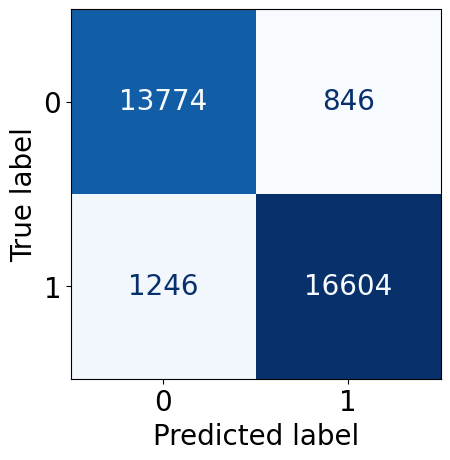

In [45]:
# Getting the best estimator from the above tuned model
rf_best = rf_search.best_estimator_

# Predicting on the TEST set
y_pred = rf_best.predict(X_test_select)

# Printing prediction performance of Random Forest on the TEST data
print_scores(y_test, y_pred)

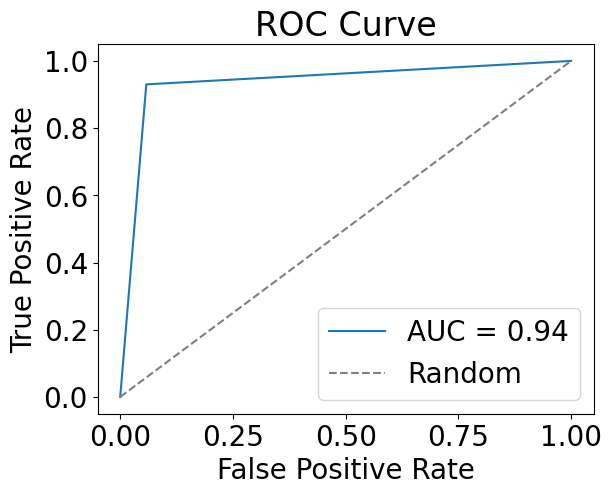

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show();

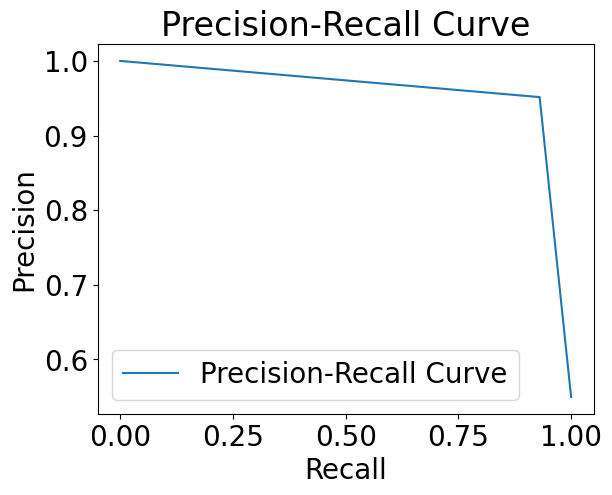

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show();

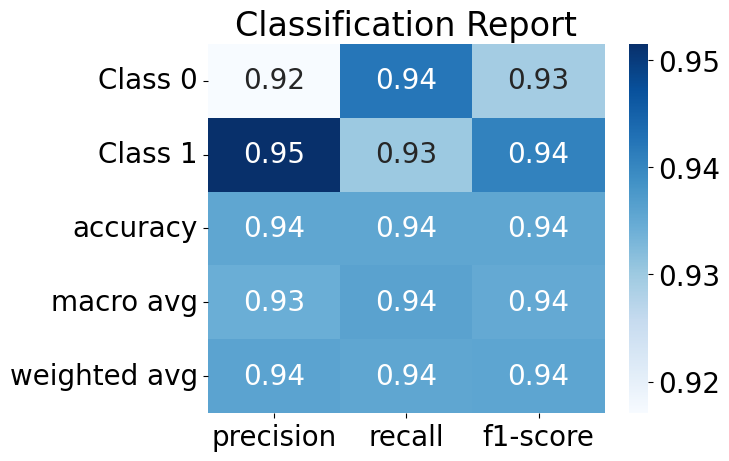

In [48]:
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show();

### **i. Saving the Final Model**

In [49]:
import joblib

final_model = rf_best
joblib.dump(final_model, "investico_airline_cust_satisfaction_prediction.pkl")

['investico_airline_cust_satisfaction_prediction.pkl']

## **10. Conclusion**

---

- Looking at the model performance, we can confidently say that this is one of the best models to predict Customer Satisfaction.
- Based on the Confusion Matrix, we see that out of the 32,470 customers in our test set, exactly 45% of the customers are dissatisfied with their Airline experience.
- As consultants to the Airline, we have managed to identify the top areas and features that most deeply affect a passenger's satisfaction or the lack thereof. Our advice to the airline would be to initially focus on improving these select 13 features in order to improve overall satisfaction.
- We mentioned earlier that Satisfaction is a fairly subjective experience and we stand by it. However, we also acknowledge that some aspects that lead to satisfaction are in control of the airline. By working on the select features, Investico Airlines has a greater chance of improving customer experiences, thus leading to better recall and loyalty.
- Customer service is an ongoing process which always has room for improvement. The features highlighted in this project are important to customer satisfaction as of now, but might change and in order to stay relevant, the airline must conduct such surveys and gather data about their customer's experiences in order to keep providing exceptional service and improving their service levels.